In [267]:
# install dependencies
! pip3 install seaborn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [268]:
# import libraries and read data

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

data = pd.read_csv("diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# 1-1: Preprocessing

In [269]:
# we'll drop useless columns

data = data.drop('Unnamed: 0', axis=1)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [270]:
# check if there is any null value in the data
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [271]:
set(data['cut'])

{'Fair', 'Good', 'Ideal', 'Premium', 'Very Good'}

In [272]:
set(data['color'])

{'D', 'E', 'F', 'G', 'H', 'I', 'J'}

In [273]:
set(data['clarity'])

{'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'}

I: Included

VVS: Very Very Slightly Included

SI: Slightly Included

IF: Internally flawless

In [274]:
cut_to_int = { 
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}

clarity_levels = ['I1', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'IF']
clarity_to_int = { clarity_levels[i]: i+1 for i in range(0, len(clarity_levels)) }
print(clarity_to_int)

{'I1': 1, 'SI1': 2, 'SI2': 3, 'VS1': 4, 'VS2': 5, 'VVS1': 6, 'VVS2': 7, 'IF': 8}


In [275]:
data['cut'] = data['cut'].apply(cut_to_int.get)
data['clarity'] = data['clarity'].apply(clarity_to_int.get)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,E,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,E,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,E,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,I,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,J,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,D,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,D,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,D,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,H,3,61.0,58.0,2757,6.15,6.12,3.74


In [276]:
# drop useless columns

data['xy'] = data[['x', 'y']].max(axis=1)
data = data.drop(columns=['x','y'])
data.head()

,carat,cut,color,clarity,depth,table,price,z,xy
0,0.23,5,E,3,61.5,55.0,326,2.43,3.98
1,0.21,4,E,2,59.8,61.0,326,2.31,3.89
2,0.23,2,E,4,56.9,65.0,327,2.31,4.07
3,0.29,4,I,5,62.4,58.0,334,2.63,4.23
4,0.31,2,J,3,63.3,58.0,335,2.75,4.35


replace categorical columns with numerical

In [277]:
data = pd.get_dummies(data)
data.head()

,carat,cut,clarity,depth,table,price,z,xy,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,5,3,61.5,55.0,326,2.43,3.98,0,1,0,0,0,0,0
1,0.21,4,2,59.8,61.0,326,2.31,3.89,0,1,0,0,0,0,0
2,0.23,2,4,56.9,65.0,327,2.31,4.07,0,1,0,0,0,0,0
3,0.29,4,5,62.4,58.0,334,2.63,4.23,0,0,0,0,0,1,0
4,0.31,2,3,63.3,58.0,335,2.75,4.35,0,0,0,0,0,0,1


# 1-2

Correlation map between columns

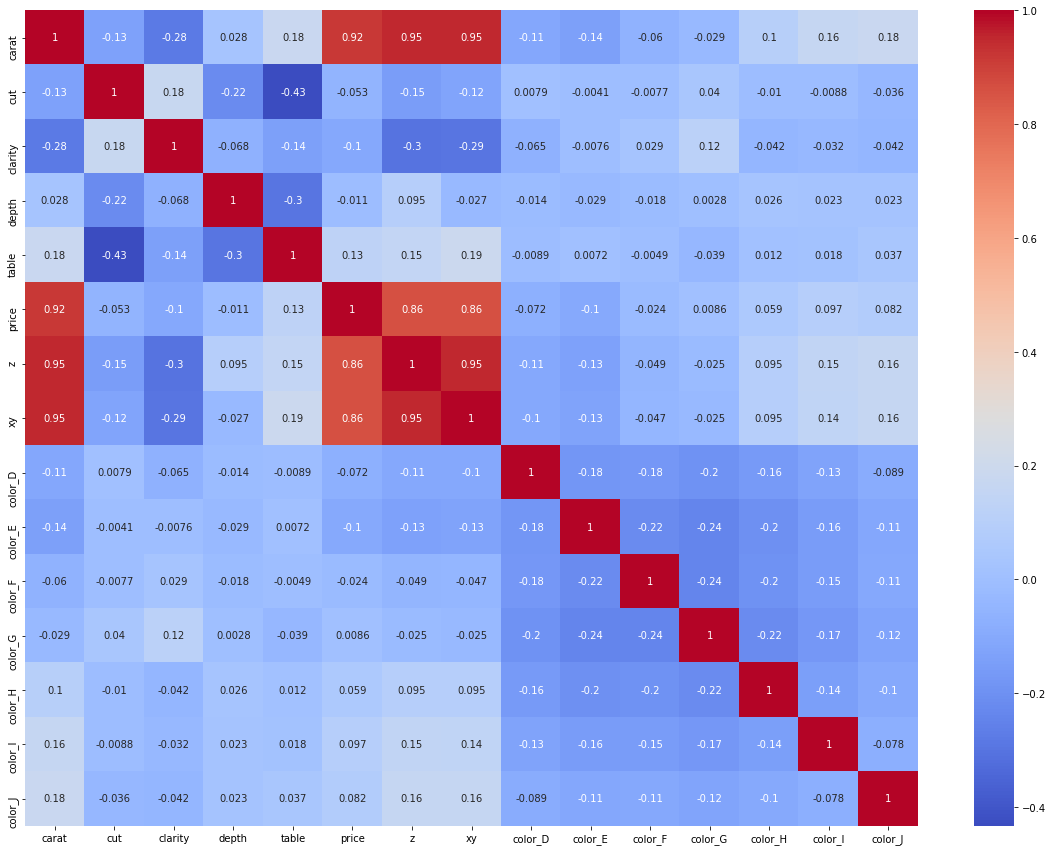

In [278]:
plt.figure(figsize=(20, 15))
correlations = data.corr()
sns.heatmap(correlations, cmap='coolwarm', annot=True)
plt.show()

# 1-3

Pair plot

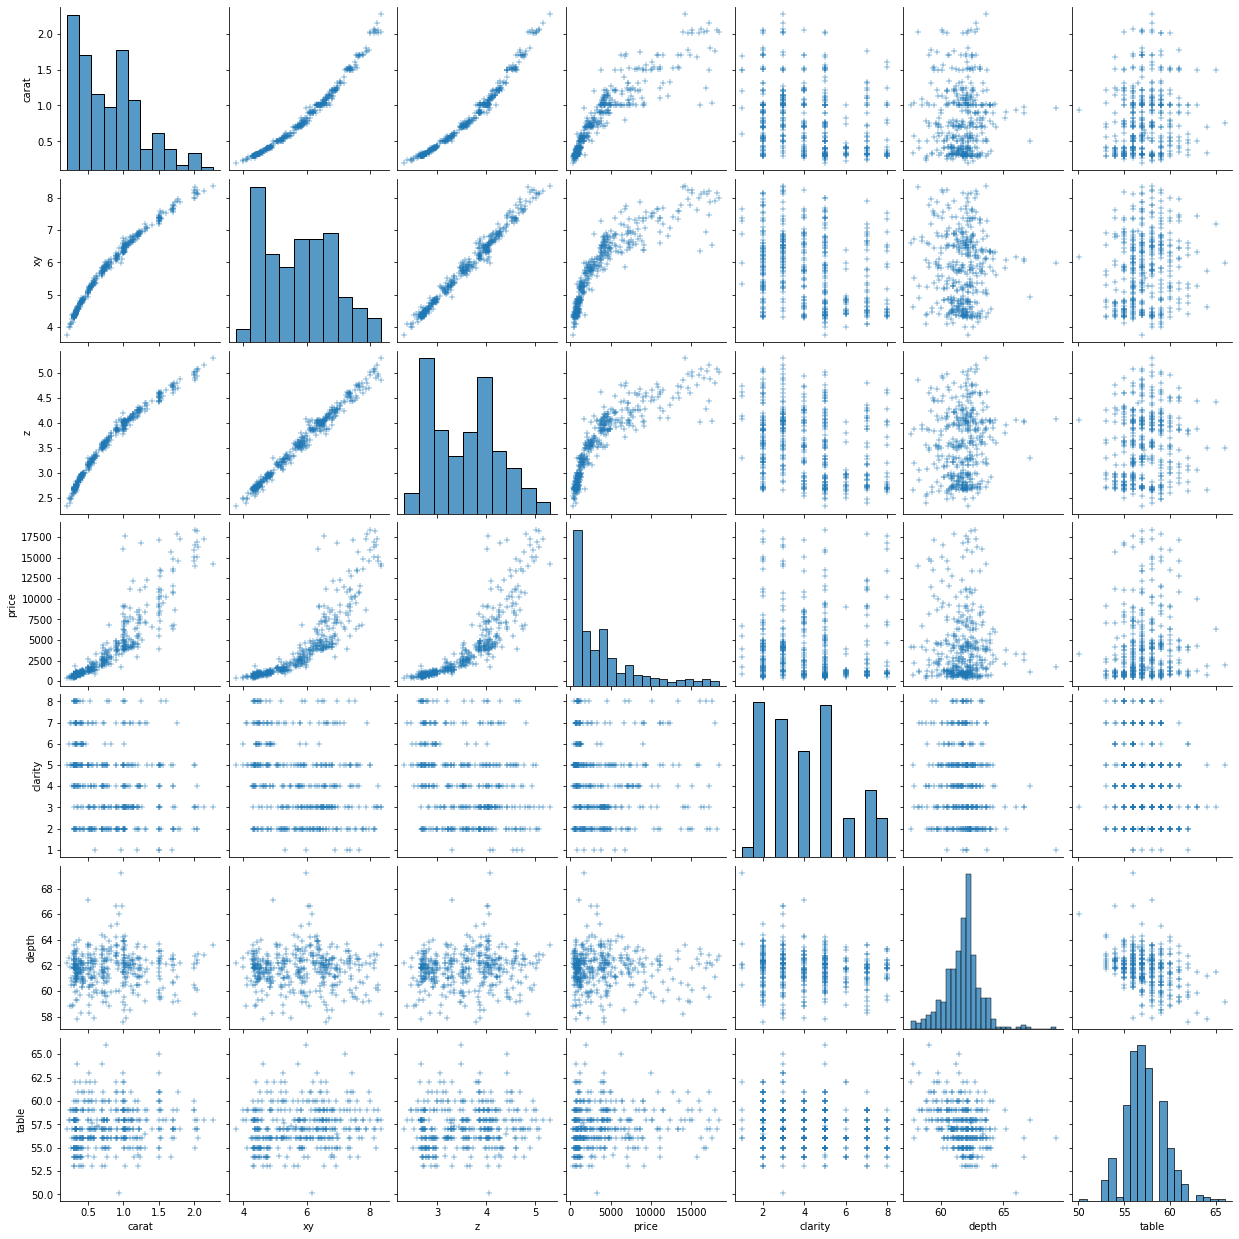

In [279]:
correlated_columns = ['carat', 'xy', 'z', 'price']
other_columns = ['clarity', 'depth', 'table']
cols = correlated_columns + other_columns
data_to_be_pairplotted = data[cols].sample(400)
# could've also specified hue
graph = sns.pairplot(data_to_be_pairplotted, markers='+')
plt.show()

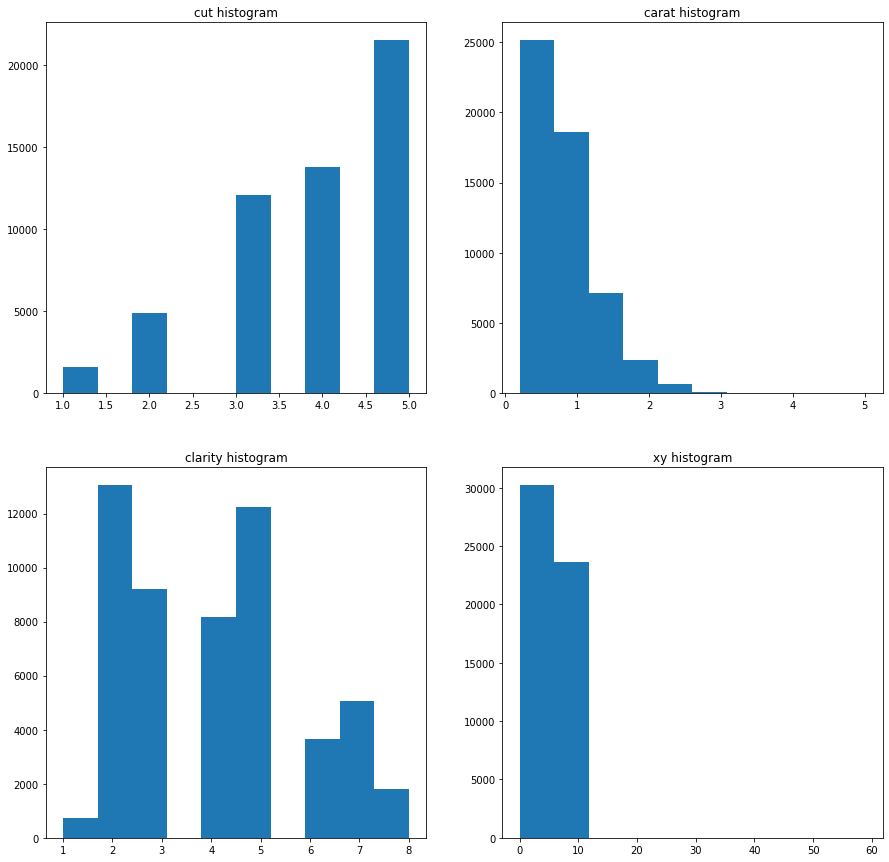

In [280]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))
indices = [(i,j) for i in range(2) for j in range(2)]
for col, i in zip(['cut', 'carat', 'clarity', 'xy'], indices):
    axs[i].hist(data[col])
    axs[i].set_title(col + ' histogram')
plt.show()

In [281]:
# could've also plotted scatter plots

## Outlier detection and drop

<AxesSubplot:xlabel='carat'>

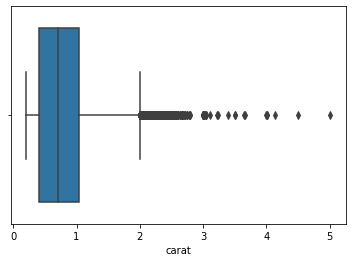

In [282]:
# Box Plot
import seaborn as sns
sns.boxplot(data['carat'])

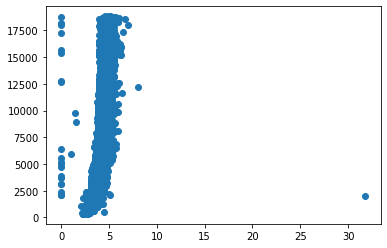

In [283]:
plt.scatter(data['z'], data['price'])

In [284]:
data = data[data['z'] <= 6.6]
data = data[2 <= data['z']]

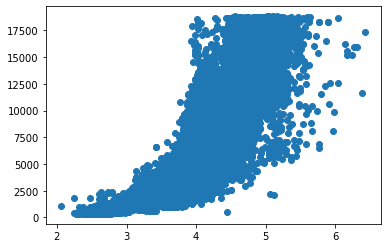

In [287]:
plt.scatter(data['z'], data['price'])

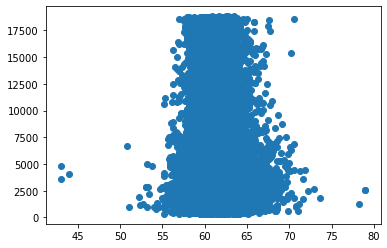

In [285]:
plt.scatter(data['depth'], data['price'])

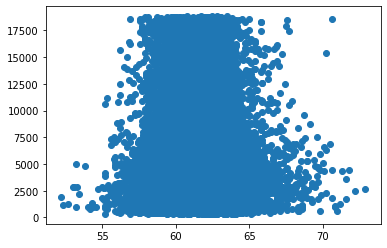

In [288]:
data = data[data['depth'] >= 52]
data = data[data['depth'] <= 73]
plt.scatter(data['depth'], data['price'])

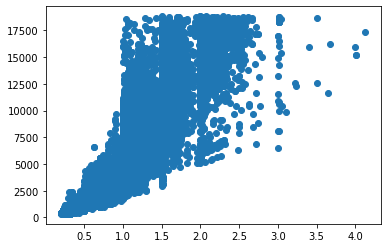

In [289]:
plt.scatter(data['carat'], data['price'])

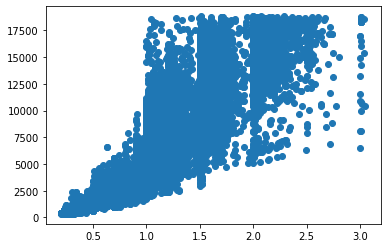

In [290]:
data = data[data['carat'] <= 3.1]
plt.scatter(data['carat'], data['price'])

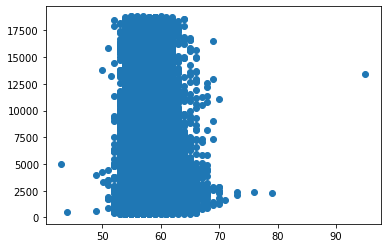

In [291]:
plt.scatter(data['table'], data['price'])

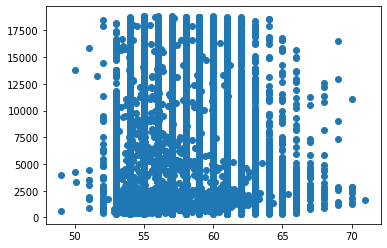

In [293]:
data = data[49 <= data['table']]
data = data[data['table'] <= 72]
plt.scatter(data['table'], data['price'])

# 1-4 Diamond Price Prediction

The problem: predicting price of a diamond

In [242]:
def preprocess(data, target_label):
    '''
    returns scaled train data and test data
    '''

    # split data between features and target

    def split_feature_target(data, label):
        features = data.drop(label, axis=1)
        target = data[label]
        return features, target

    features, target = split_feature_target(data, target_label)

    # split data between train and test

    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 1234)

    
    # scale data
    
    from sklearn.preprocessing import StandardScaler # using MinMaxScaler after splitting would cause problems because of possible oulier data
    scaler = StandardScaler()

    def scale_data(data):
        return pd.DataFrame(scaler.fit_transform(data))

    X_train = scale_data(X_train)
    X_test = scale_data(X_test)


    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = preprocess(data, 'price')

X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.916665,-0.812153,-1.742486,0.107242,1.406577,0.965607,0.948205,-0.378125,-0.470971,-0.464310,-0.515295,2.340163,-0.334739,-0.231890
1,0.937804,0.084417,-0.613379,-0.381655,-0.204734,1.007993,1.095196,-0.378125,-0.470971,-0.464310,-0.515295,2.340163,-0.334739,-0.231890
2,0.430473,0.980987,-1.177933,0.526296,-0.652321,0.654775,0.567758,-0.378125,-0.470971,-0.464310,-0.515295,-0.427321,2.987401,-0.231890
3,0.493889,0.084417,-1.177933,-0.451498,0.690439,0.640646,0.697456,-0.378125,-0.470971,-0.464310,-0.515295,2.340163,-0.334739,-0.231890
4,-0.837856,0.980987,2.209389,0.456453,-0.652321,-0.842873,-0.884857,-0.378125,-0.470971,-0.464310,-0.515295,-0.427321,2.987401,-0.231890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43147,-0.880134,0.980987,1.080282,-0.102286,-0.652321,-0.913517,-0.902150,-0.378125,-0.470971,-0.464310,-0.515295,-0.427321,2.987401,-0.231890
43148,-1.049244,0.980987,-0.048825,0.246926,-1.099907,-1.196092,-1.213425,-0.378125,-0.470971,2.153735,-0.515295,-0.427321,-0.334739,-0.231890
43149,2.565493,0.980987,-1.177933,0.246926,-0.652321,2.067650,2.011727,-0.378125,-0.470971,-0.464310,-0.515295,-0.427321,-0.334739,4.312393
43150,-0.922412,0.084417,-0.048825,-0.940394,0.242852,-1.026547,-0.936736,-0.378125,2.123275,-0.464310,-0.515295,-0.427321,-0.334739,-0.231890


## Testing different models

In [108]:
model_scores = {}

## Linear Regression

In [294]:
# could append a column of ones like this but it is done automatically anyway
# X = np.hstack((np.array(X_train), np.ones(shape=(len(X),1))))
X = X_train
y = y_train

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,y)

# r2 score
model_scores['LR'] = linreg.score(X_test, y_test)
model_scores['LR']

0.8958128289997447

## KNN

In [295]:
from sklearn.neighbors import KNeighborsRegressor

N = 10
scores = np.zeros(shape=(N+1,1))
for n in range(1,N+1):
    knr = KNeighborsRegressor(n_neighbors=n)
    knr.fit(X_train, y_train)
    scores[n] = knr.score(X_test, y_test)

In [296]:
scores

array([[0.        ],
       [0.94097198],
       [0.95329748],
       [0.9556737 ],
       [0.95729482],
       [0.95686727],
       [0.957434  ],
       [0.9570414 ],
       [0.95670601],
       [0.95597636],
       [0.95548646]])

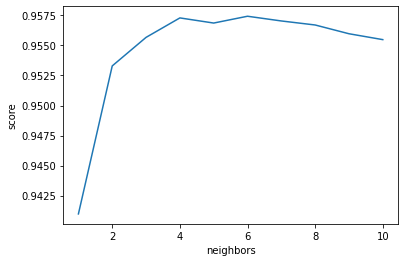

In [299]:
plt.ylabel('score')
plt.xlabel('neighbors')
plt.plot(np.arange(1, N+1), scores[1:])
plt.show()

In [300]:
i = np.argmax(scores)
print(f'chose neighbors={i} as hyperparamter')
print('score:', scores[i])

chose neighbors=6 as hyperparamter
score: [0.957434]


## Lasso

In [110]:
from sklearn.linear_model import Lasso

N = 40
x = N//2
for step in [2, 1, 0.5, 0.1]:
    scores = np.zeros(N)
    begin = max(int(x - N/4*step), 0)
    end = min(int(x + N/4*step), N)
    
    alpha_list = np.arange(begin, end, step)
    for i,alpha in enumerate(alpha_list):
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, y_train)
        scores[i] = lasso.score(X_test, y_test)
    
    print('scores:', [round(x, 4) for x in set(scores)])
    i = np.argmax(scores)
    x = alpha_list[i]
    print('x:', x, 'score: ', scores[i])

scores: [0.8958, 0.8957, 0.8955, 0.8954, 0.8952, 0.895, 0.8947, 0.8945, 0.8942, 0.8939, 0.8935, 0.0, 0.8921, 0.8916, 0.8928, 0.8925, 0.8923, 0.8931, 0.8922, 0.8919, 0.8918]
x: 0 score:  0.8958193843827789
scores: [0.8958, 0.8958, 0.8957, 0.8955, 0.8956, 0.8955, 0.8954, 0.8953, 0.8952, 0.8951, 0.0]
x: 0 score:  0.8958193843827789
scores: [0.8958, 0.8958, 0.8957, 0.8958, 0.8957, 0.8957, 0.8956, 0.8956, 0.8955, 0.8955, 0.0]
x: 0.0 score:  0.8958193843827789
scores: [0.8958, 0.8958, 0.8958, 0.8958, 0.8958, 0.8958, 0.8958, 0.8958, 0.8958, 0.8958, 0.0]
x: 0.0 score:  0.8958193843827789


The best value of alpha=0 implies Lasso is no better than linear reggression

## Random Forest

## SVM Regressor

In [311]:
from sklearn.svm import SVR

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
scores = np.zeros(len(kernels))

r = np.random.choice(len(y_train), 4000)

for i, kernel in enumerate(kernels):
    model = SVR(kernel=kernel)
    model.fit(X_train.iloc[r], y_train.iloc[r])
    scores[i] = model.score(X_test, y_test)

best = np.argmax(scores)
best_kernel = kernels[best]
best_score = scores[best]

print(f'used kernel of {kernel} with the score of {best_score}')

used kernel of sigmoid with the score of 0.7221516716952179


# 1-5 Implementing KNN

In [312]:
# Implementation of KNN algorithm
# This code also finds the best number of nearest neighbors to consider

# k: number of neighbors
# nearest: matrix of indices of K nearest neighbords of point i'th

def knn_transform(nearest, y_train):    
    y_predict = y_train[nearest].mean(axis=1)
    return y_predict

def k_nearest_neighbors(train, test, K):    
    nearest = np.zeros((len(test), K)).astype('int')
    for i,x in enumerate(test):
        d = train - x
        nearest[i, :K] = np.argpartition((d**2).sum(axis=1), K)[:K]
    return nearest
  
# K: k upper limit
def knn(X_train, y_train, X_test, y_test, K):       
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    
    nearest = k_nearest_neighbors(X_train, X_test, K)
    nearest.sort(axis=1) 
    
    err = lambda y_predict: ((y_predict - y_test)**2).mean()
    
    errors = np.array([err(knn_transform(nearest[:,:k], y_train)) for k in range(1,K)])
    best = np.argmin(errors)
    return knn_transform(nearest[:,:best], y_train), np.sqrt(errors[best]), best+1
    
    
y_knn_impl, error, best_k = knn(X_train, y_train, X_test, y_test, len(features.iloc[0]))
error

869.3134414663549

In [313]:
y_knn_impl

array([9000.41666667,  803.66666667, 1126.16666667, ..., 5324.75      ,
       1294.5       ,  692.33333333])

And now we'll compare it with scikit implementation

In [314]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=best_k)
model.fit(X_train, y_train)
# model.score(x_test, y_test)
model.predict(X_test)

array([8877.69230769,  799.23076923, 1135.46153846, ..., 5362.69230769,
       1251.15384615,  696.92307692])

In [315]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(y_test,y_knn_impl))
error

873.4322534802169

We can observe here that the results are close enough to the scikit implementation.
Also it is more optimized in finidng the best K!

# 1-8 Bootstrap

In [ ]:
# # resample data

# # train data
# # could've also used sci-kit resample
# boot_data = data.sample(frac=0.2, replace=True, random_state=1234)

# # test data:
# included = list(set(boot_data.index))
# not_included = [i for i in range(len(data)) if i not in included]
# other_data = data.iloc[not_included]

use a model on the bootstrapped data

In [ ]:
iterations = 23

def resample(data, target):
    # train
    train = data.sample(frac=0.2, replace=True)
    # test
    included = train.index
    not_included = np.setdiff1d(np.arange(len(data)), included, assume_unique=False)
    test = data.iloc[not_included]

    return train, target.iloc[included], test, target.iloc[not_included]

scores = np.zeros(iterations)

for i in range(iterations):
    X, y, X_test, y_test = resample(features_scaled, data['price'])
    reg = LinearRegression()
    reg.fit(X,y)
    scores[i] = reg.score(X_test, y_test)
    print(f'iteration: {i}, score: {scores[i]}')

print(f'mean score: {scores.mean()}')

bootstrap_score = scores.mean()

print(f"using bootstrap makes the score {'better' if bootstrap_score > linreg_score else 'worse'}")

# Feature Selection 

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import r2_score

# forward

knn = KNeighborsRegressor(n_neighbors=5)
forward_sfs = SequentialFeatureSelector(knn, direction='forward')
x_train_forward = forward_sfs.fit_transform(X=X_train, y=y_train)
print('Shape of forward feature selected data:', x_train_forward.shape)
print('forward feature selected:', forward_sfs.get_feature_names_out()) 


In [ ]:

selected_features = forward_sfs.get_support()
features_list = []

for idx,f in enumerate(selected_features):
    if f:
        features_list.append(idx)

x_test_forward = np.delete(X_test, features_list, axis=1)


knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train_forward, y_train)
y_pred = knn.predict(x_test_forward)
knn_accuracy_forward = r2_score(y_test, y_pred)*100
print('KNN accuracy on forward selected data is',knn_accuracy_forward)

# 1-9 Lasso Ridge

In [ ]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)

alpha = 1
print(f'set alpha: {alpha}')

ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge_score = ridge.score(X_test, y_test)

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
lasso_score = lasso.score(X_test, y_test)

print('lr:', lr_score)
print('ridge:', ridge_score)
print('lasso:', lasso_score)

better, worse = 'lasso', 'ridge'
if ridge_score > lasso_score:
    better, worse = worse, better
print(f'{better} performed better than {worse}')

# 1-10 Bias Variance

In [ ]:
a = np.arange(10)
a

In [ ]:

z = np.ones(10)
z[1] = False
Z = make_mask(z)
Z

In [ ]:
a[Z]

In [ ]:
i = 9
print(a)
a[np.arange(len(a)) - [i]]
np.arange(len(a)).

In [ ]:
# pick random datapoint

from numpy.ma import make_mask
from numpy.random import randrange

n = len(X)

mask = make_mask(np.zeros(n))
mask[randint(n)] = True

X_train, y_train = 
r = randrange(n)
X_test = np.array(
Y_test = np
test_idx = randrange(len(X))
x_test_ens = np.array([X[test_idx]])
y_test_ens = Y[test_idx]

X_ens = np.delete(arr=X, obj=test_idx, axis=0)
Y_ens = np.delete(arr=Y, obj=test_idx, axis=0)

In [237]:
mask = np.array([True])

In [239]:
~ mask

array([False])